# The Sparks Foundation - GRIP 

Task 1 - Prediction using Supervised ML

Name:- Shivam Tyagi

Predict the percentage of a student based on the number of study hours.

#### Importing all the required Libraries 

In [1]:
import pandas as pd # for creation of dataframes and data manipulation.
import numpy as np  # for creation of multi-dimensional array.

#for visualization.
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

###### Importing the data into an Dataframe.

In [3]:
df = pd.read_csv("http://bit.ly/w-data")

In [4]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


##### Visualization 

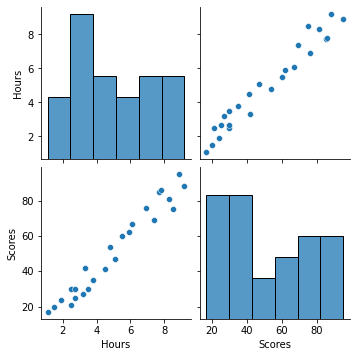

In [7]:
sns.pairplot(df)

##### Creating new DataFrames for features and labels

In [8]:
X = df.iloc[:, :-1].values

In [9]:
y = df.iloc[:, 1].values 

###### Importing train_test_split for creating train and test data.

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train, xtest, ytrain, ytest = train_test_split(X , y ,test_size=0.3 , random_state=0)

##### Importing Linear Regression from sklearn

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
l_model = LinearRegression() # Model creation

In [14]:
l_model.fit(x_train , ytrain)  # fitting 

LinearRegression()

In [15]:
l_model.intercept_

2.37081538234186

In [16]:
l_model.coef_

array([9.78856669])

In [17]:
l = l_model.coef_*X + l_model.intercept_  

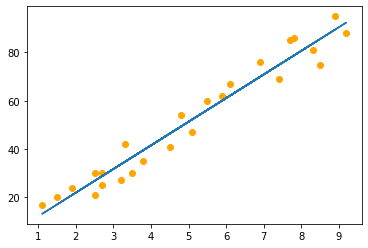

In [18]:
plt.plot(X,l)
plt.scatter(X,y,c='orange')

In [19]:
y_pred = l_model.predict(xtest)

###### Model Evaluation

In [20]:
from sklearn import metrics

In [21]:
xtest = xtest.flatten()

In [22]:
new_df = pd.DataFrame({'Actual': ytest, 'Predicted': y_pred , 'Hours' : xtest})  
new_df   # new dataframe which contains actual,predicted and hour values.

,Actual,Predicted,Hours
0,20,17.053665,1.5
1,27,33.694229,3.2
2,69,74.806209,7.4
3,30,26.842232,2.5
4,62,60.123359,5.9
5,35,39.567369,3.8
6,24,20.969092,1.9
7,86,78.721636,7.8


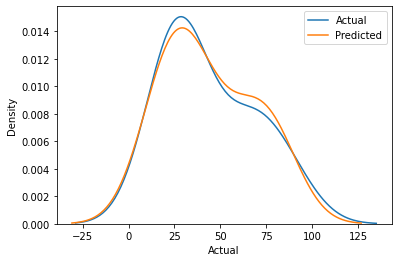

In [31]:
sns.kdeplot(x = new_df.Actual , label = "Actual")
sns.kdeplot(x= new_df.Predicted , label = "Predicted")
plt.legend() 

In [24]:
print('Mean-Absolute Error :- ',metrics.mean_absolute_error(ytest,y_pred))
print('Mean-Squared Error:- ',metrics.mean_squared_error(ytest,y_pred))
print('R-squared-value:- ',metrics.r2_score(ytest,y_pred))

Mean-Absolute Error :-  4.419727808027654
Mean-Squared Error:-  22.965097212700417
R-squared-value:-  0.9568211104435258


In [25]:
h = 9
score = l_model.predict([[h]])
print(score)

[90.46791556]
